# Loading libraries

In [68]:
#Importing libraries for data manipulation
import pandas as pd
import numpy as np

#Importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Importing libraries for time series
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

#Importing libraries for stop future warnings
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [69]:
#Loading data 
data1 = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Time_Series_Data/M2SLMoneyStock.csv', 
                    index_col=0, 
                    parse_dates=True)
data2 = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Time_Series_Data/PCEPersonalSpending.csv', 
                    index_col=0, 
                    parse_dates=True)

In [70]:
#Changing frequency of the data
data1.index.freq = 'MS'
data2.index.freq = 'MS'

# Combining data

In [71]:
#Combining the data
data = data1.join(data2)

In [72]:
#Checking data
data

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
...,...,...
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8
2015-10-01,12187.7,12416.1


Observation:
- Data consist of 21 years i.e. 252 months
- It is a monthwise data

In [73]:
#Checking shape of the data
data.shape

(252, 2)

In [74]:
#Dropping NA
data.dropna(inplace=True)

In [75]:
#Checking shape of the data
data.shape

(252, 2)

# Visualizing the data

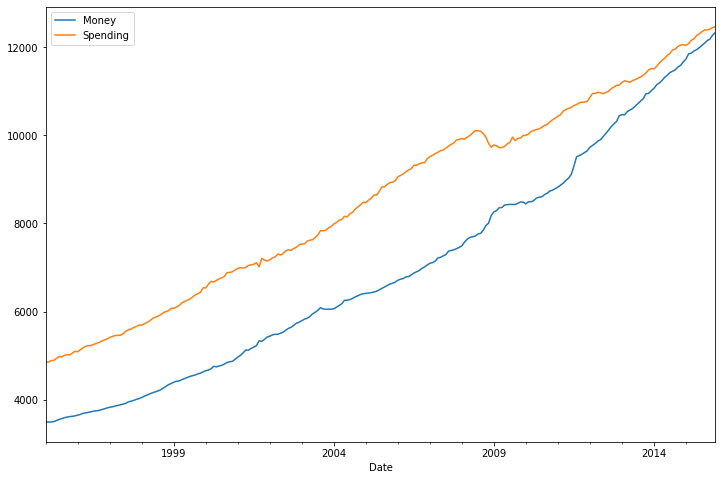

In [8]:
#Plotting the data
data.plot(figsize=(12,8));

Observation:
- Increasing the money as increasing the spending.

In [104]:
data.columns

Index(['Money', 'Spending'], dtype='object')

# Checking stationarity

In [105]:
#Creating function which extract summary from dicky fuller test
def DICKY_FULLER_TEST(data):
    result = adfuller(data)
    critical_value = result[0]
    p_value = result[1]
    lags = result[2]
    observation = result[3]
    cv = []
    print('Dicky Fuller Test Summary:')
    print('1. ADFT Statistics:',critical_value)
    print('2. P-value        :',p_value)
    print('3. Lags           :',lags)
    print('4. Observations   :',observation)
    print('5. Critical Values:')
    for i,j in result[4].items():
        cv.append(j)
        print('                  ',i,'=>',j)
    print('6.Test conclusion from p-value :')
    if p_value<0.05:
        print('  It is a stationary')
    else:
        print('  It is not a stationary')
    print('7.Test conclusion from critical value :')
    if (critical_value<cv[0]) & (critical_value<cv[1]) & (critical_value<cv[2]):
        print('  It is a stationary')
    else:
        print('  It is not a stationary')

In [109]:
#Checking stationarity through dicky fuller test on Money & Spending variable
print('Money Variable')
DICKY_FULLER_TEST(data['Money'])

print('\n')

print('Spending Variable')
DICKY_FULLER_TEST(data['Spending'])

Money Variable
Dicky Fuller Test Summary:
1. ADFT Statistics: 4.239022425670653
2. P-value        : 1.0
3. Lags           : 4
4. Observations   : 247
5. Critical Values:
                   1% => -3.457105309726321
                   5% => -2.873313676101283
                   10% => -2.5730443824681606
6.Test conclusion from p-value :
  It is not a stationary
7.Test conclusion from critical value :
  It is not a stationary


Spending Variable
Dicky Fuller Test Summary:
1. ADFT Statistics: 0.14979608598625554
2. P-value        : 0.9693009944428312
3. Lags           : 3
4. Observations   : 248
5. Critical Values:
                   1% => -3.4569962781990573
                   5% => -2.8732659015936024
                   10% => -2.573018897632674
6.Test conclusion from p-value :
  It is not a stationary
7.Test conclusion from critical value :
  It is not a stationary


Observation:
- Both the variables are not stationary

# Computing first order differencing & visualize the data

In [111]:
#Differencing the data
data_transformed = data.diff().dropna()
data_transformed

,Money,Spending
Date,,
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9
1995-06-01,24.7,44.4
...,...,...
2015-08-01,51.5,38.6
2015-09-01,57.0,-1.2
2015-10-01,33.9,23.3


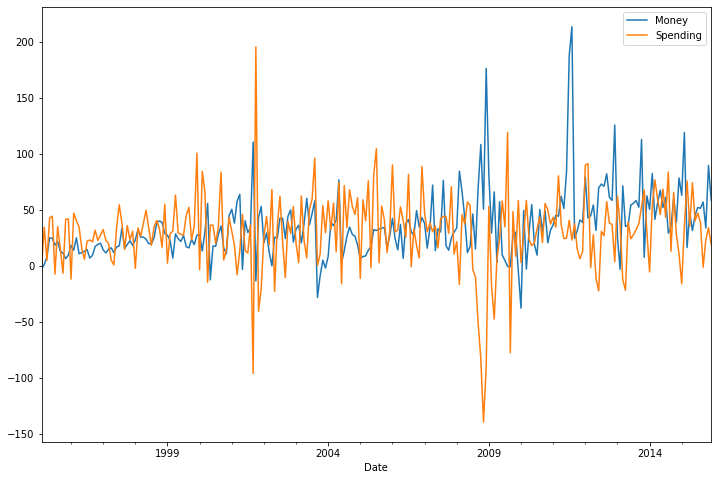

In [112]:
#Plotting the data
data_transformed.plot(figsize=(12,8));

# Checking stationarity on first order differencing

In [122]:
#Checking stationarity through dicky fuller test on Money & Spending variable first order
print('***Money Variable first  order***')
DICKY_FULLER_TEST(data_transformed['Money'])

print('\n')

print('***Spending Variable first  order***')
DICKY_FULLER_TEST(data_transformed['Spending'])

***Money Variable first  order***
Dicky Fuller Test Summary:
1. ADFT Statistics: -2.0574040497379382
2. P-value        : 0.2619837978511249
3. Lags           : 15
4. Observations   : 235
5. Critical Values:
                   1% => -3.4584868856997004
                   5% => -2.873918902362675
                   10% => -2.573367247623359
6.Test conclusion from p-value :
  It is not a stationary
7.Test conclusion from critical value :
  It is not a stationary


***Spending Variable first  order***
Dicky Fuller Test Summary:
1. ADFT Statistics: -7.226973930850651
2. P-value        : 2.0410272592129196e-10
3. Lags           : 2
4. Observations   : 248
5. Critical Values:
                   1% => -3.4569962781990573
                   5% => -2.8732659015936024
                   10% => -2.573018897632674
6.Test conclusion from p-value :
  It is a stationary
7.Test conclusion from critical value :
  It is a stationary


Observation:
- After first order differencing, yet Money variable is not a stationary.
- After first order differencing, yet Spending variable is become a stationary.

# Computing second order differencing & visualize the data

In [117]:
#2nd Order Differencing the data
data_transformed2 = data_transformed.diff().dropna()
data_transformed2

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7
...,...,...
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8
2015-10-01,-23.1,24.5


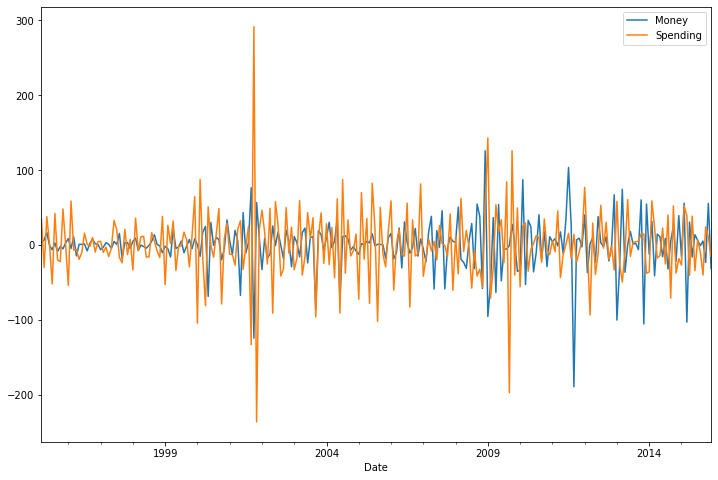

In [118]:
#Plotting the data
data_transformed2.plot(figsize=(12,8));

# Checking stationarity on second order differencing

In [123]:
#Checking stationarity through dicky fuller test on Money & Spending variable second order
print('***Money Variable second order***')
DICKY_FULLER_TEST(data_transformed2['Money'])

print('\n')

print('***Spending Variable second order***')
DICKY_FULLER_TEST(data_transformed2['Spending'])

***Money Variable second order***
Dicky Fuller Test Summary:
1. ADFT Statistics: -7.0774707943430295
2. P-value        : 4.76067493129575e-10
3. Lags           : 14
4. Observations   : 235
5. Critical Values:
                   1% => -3.4584868856997004
                   5% => -2.873918902362675
                   10% => -2.573367247623359
6.Test conclusion from p-value :
  It is a stationary
7.Test conclusion from critical value :
  It is a stationary


***Spending Variable second order***
Dicky Fuller Test Summary:
1. ADFT Statistics: -8.76014542633771
2. P-value        : 2.68789996798731e-14
3. Lags           : 8
4. Observations   : 241
5. Critical Values:
                   1% => -3.4577787098622674
                   5% => -2.873608704758507
                   10% => -2.573201765981991
6.Test conclusion from p-value :
  It is a stationary
7.Test conclusion from critical value :
  It is a stationary


Observation:
- After second order differencing, Money variable is become a stationary.
- In first & second order differencing, Spending variable have a stationary.

# Splitting data into train and test

In [125]:
#Checking the size of the data
data.shape

(252, 2)

In [126]:
#Splitting data into train(1995 to 2014) and test(2015)
train = data_transformed2[:-12]
test = data_transformed2[-12:]
train.shape, test.shape

((238, 2), (12, 2))

# Creating VAR Model

In [129]:
#Creating VAR model
model = VAR(train)

#Extracting AIC for 7 iteration and identify the lowest AIC
for p in [1,2,3,4,5,6,7]:
    results = model.fit(p)
    AIC.append(results.aic)
    print(f'ORDER {p}')
    print(f'AIC:{results.aic}')
    print('\n')

ORDER 1
AIC:14.178610495220896


ORDER 2
AIC:13.955189367163703


ORDER 3
AIC:13.849518291541038


ORDER 4
AIC:13.827950574458281


ORDER 5
AIC:13.78730034460964


ORDER 6
AIC:13.799076756885809


ORDER 7
AIC:13.79763872791397




In [157]:
#Another way to extracting AIC for 7 iteration and identify the lowest AIC
model.select_order(10).summary()

,AIC,BIC,FPE,HQIC
0,14.81,14.84,2.703e+06,14.82
1,14.23,14.33,1.521e+06,14.27
2,14.01,14.16,1.211e+06,14.07
3,13.89,14.10*,1.081e+06,13.98
4,13.87,14.14,1.055e+06,13.98
5,13.83,14.16,1.011e+06,13.96*
6,13.83,14.22,1.016e+06,13.99
7,13.82,14.27,1.007e+06,14.00
8,13.76*,14.28,9.508e+05*,13.97
9,13.78,14.35,9.629e+05,14.01


Observation:
- ORDER 5 have lowest AIC:13.78730034460964

# Fitting VAR model with lowest AIC

In [131]:
#fifth order has very low AIC:13.78730034460964
results.model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Mar, 2021
Time:                     16:41:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.2447
Nobs:                     231.000    HQIC:                   13.9780
Log likelihood:          -2219.18    FPE:                    982647.
AIC:                      13.7976    Det(Omega_mle):         866465.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.723987         1.785683            0.405           0.685
L1.Money           -0.691409         0.070336           -9.830           0.000
L1.Spending        -0.134870         0.053049           -2.542      

Observation:
- Model grab 7 lags while fitting the model on 5th order

# Prediction on VAR Model

In [145]:
#Grab 7 lagged values right before the test starts
lagged_values = train.values[-7:]
lagged_values

array([[-15.5,  22.8],
       [  9. , -25.1],
       [-31.9,  40.3],
       [  5.6, -70.7],
       [ 25.5,  52.5],
       [-21.3, -37.2],
       [ 39.5, -17.8]])

In [146]:
#Prediction for next 12 months
z = results.forecast(y = lagged_values, steps = 12)
z

array([[-12.57227119,  35.18888822],
       [ -2.7043566 ,  -9.7998868 ],
       [ -0.36057471,  -5.65835054],
       [ -8.3932216 ,   7.292353  ],
       [  4.23674361,   0.57158603],
       [  1.96914484,  -4.05002312],
       [ -3.97506816,   8.08038215],
       [  5.61488965,  -8.10534738],
       [ -0.30083495,   2.85568969],
       [ -2.0160078 ,  -1.30337801],
       [  2.43410941,  -0.18540655],
       [ -1.81980222,   1.20322619]])

In [148]:
#Another way to put y
results.forecast(y = results.y, steps = 12)

array([[-12.57227119,  35.18888822],
       [ -2.7043566 ,  -9.7998868 ],
       [ -0.36057471,  -5.65835054],
       [ -8.3932216 ,   7.292353  ],
       [  4.23674361,   0.57158603],
       [  1.96914484,  -4.05002312],
       [ -3.97506816,   8.08038215],
       [  5.61488965,  -8.10534738],
       [ -0.30083495,   2.85568969],
       [ -2.0160078 ,  -1.30337801],
       [  2.43410941,  -0.18540655],
       [ -1.81980222,   1.20322619]])

In [144]:
#Creating date from 2015-01-01 to 2015-12-01
idx = pd.date_range('2015-01-01', periods=12, freq='MS')
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [58]:
#Creating dataframe
data_forecast = pd.DataFrame(z, index=idx, columns=['Money_2nd', 'Spending_2nd'])
data_forecast

,Money_2nd,Spending_2nd
2015-01-01,-12.572271,35.188888
2015-02-01,-2.704357,-9.799887
2015-03-01,-0.360575,-5.658351
2015-04-01,-8.393222,7.292353
2015-05-01,4.236744,0.571586
2015-06-01,1.969145,-4.050023
2015-07-01,-3.975068,8.080382
2015-08-01,5.614890,-8.105347
2015-09-01,-0.300835,2.855690
2015-10-01,-2.016008,-1.303378


In [149]:
#Computing cumulative of (last value of train - second last value of train + Spending_2nd)
data_forecast['Money_1d'] = (data['Money'].iloc[-12-1]-data['Money'].iloc[-12-2]) + data_forecast['Money_2nd'].cumsum()
#Computing cumulative of (last value of train + Money_1d)
data_forecast['MoneyForecast'] = data['Money'].iloc[-12-1]+data_forecast['Money_1d'].cumsum()

#Computing cumulative of (last value of train - second last value of train + Spending_2nd)
data_forecast['Spending_1d'] = (data['Spending'].iloc[-12-1]-data['Spending'].iloc[-12-2]) + data_forecast['Spending_2nd'].cumsum()
#Computing cumulative of (last value of train + Spending_2nd)
data_forecast['SpendingForecast'] = data['Spending'].iloc[-12-1]+data_forecast['Spending_1d'].cumsum()

In [150]:
#Checking the data
data_forecast.head()

,Money_2nd,Spending_2nd,Money_1d,MoneyForecast,Spending_1d,SpendingForecast
2015-01-01,-12.572271,35.188888,66.027729,11736.127729,45.788888,12107.788888
2015-02-01,-2.704357,-9.799887,63.323372,11799.451101,35.989001,12143.777890
2015-03-01,-0.360575,-5.658351,62.962797,11862.413899,30.330651,12174.108541
2015-04-01,-8.393222,7.292353,54.569576,11916.983474,37.623004,12211.731544
2015-05-01,4.236744,0.571586,58.806320,11975.789794,38.194590,12249.926134


# Visualizing Actual and Predicted

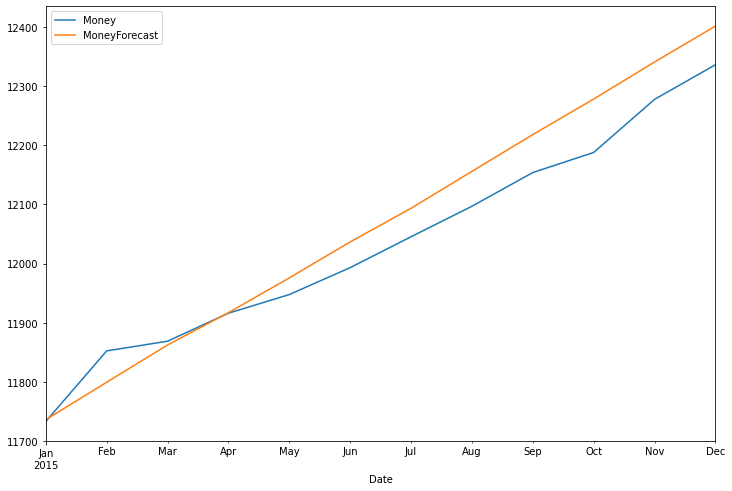

In [151]:
#Plotting Atual and Forecast of Money
test_range['Money'].plot(legend =True, figsize=(12,8));
data_forecast['MoneyForecast'].plot(legend = True);

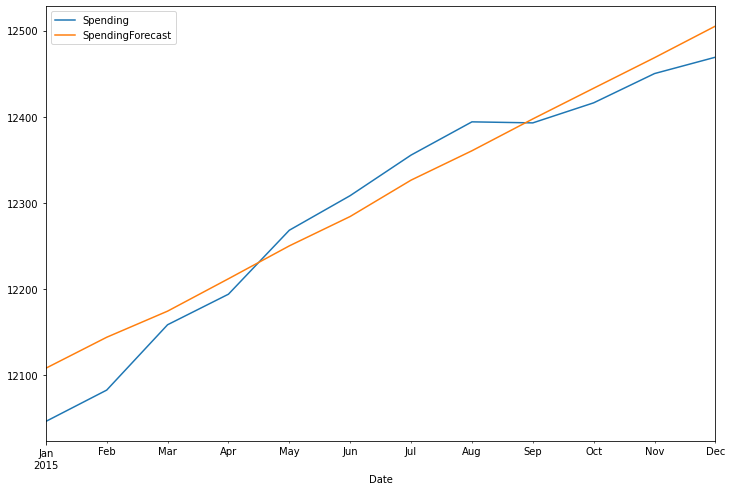

In [152]:
#Plotting Atual and Forecast of Spending
test_range['Spending'].plot(legend =True, figsize=(12,8));
data_forecast['SpendingForecast'].plot(legend = True);

# Evaluation of the performance of the model

In [153]:
#Computing RMSE of money
RMSE = rmse(test_range['Money'], data_forecast['MoneyForecast'])
Mean = test_range['Money'].mean()
print('RMSE of Money:', RMSE)
print('Mean of Money:', Mean)

RMSE of Money: 51.51214353726548
Mean of Money: 12034.008333333333


In [154]:
#Computing RMSE of money
RMSE = rmse(test_range['Spending'], data_forecast['SpendingForecast'])
Mean = test_range['Spending'].mean()
print('RMSE of Spending:', RMSE)
print('Mean of Spending:', Mean)

RMSE of Spending: 32.91918978743792
Mean of Spending: 12294.533333333335
